# Gradient Descent

Hudson Arney and Carson Willms

### Import Statements

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import time

Creating a set of random points with a X val random from 1-100 and a y value following the expression y = 4 + 3x with some random offset

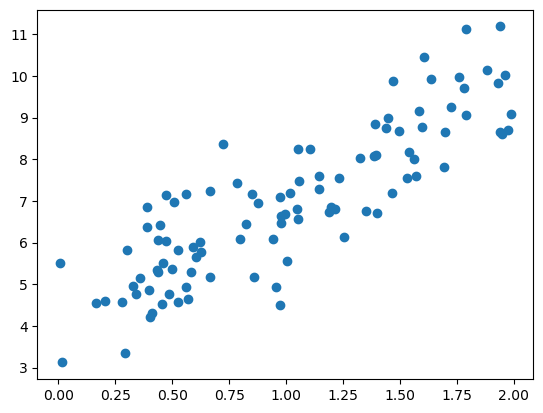

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)
plt.scatter(X, y)

Defining an eval function to determine correctness of prediction (We used MSE as our eval)

In [3]:
def cal_cost(theta, X, y):
    '''
    theta - vector of weights for each variable 
    X - vector of all independent variables
    y - vector of dependent variable
    '''
    m = len(y)
    
    predictions = X.dot(theta) #USING DOT PRODUCT TO APPLY WEIGHTS TO EACH INDEPENDENT VARIABLE
    cost = (1/2*m) * np.sum(np.square(predictions-y)) #CALCULATING COST USING MSE
    return cost

##### Gradient Descent Algorithm

Intuitive approach:
1) initialize weights
2) apply weights to independent variables
3) calculate closeness to local optimum
4) tweak weights accordingly
5) repeat

This calculates the gradient vector containing the partial derivatives for each parameter in theta

In [4]:
def gradient_descent(X,y,theta,learning_rate=.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations) #INITIALIZING ARRAY OF PAST COSTS
    theta_history = np.zeros((iterations, 2)) #INITIALIZING ARRAY OF PAST WEIGHTS
    for it in range(iterations):
        prediction = np.dot(X, theta)
        errors = prediction - y

        gradient = (1/m) * X.T.dot(errors) # COMPUTE PARTIAL DERVIATIVE

        theta = theta - learning_rate * gradient # UPDATE WEIGHTS USING GRADIENT AND L.R.
        theta_history[it, :] = theta.T
        cost_history[it] = cal_cost(theta, X, y)
    return theta, cost_history, theta_history

Testing Gradient descent (final thetas are very close to the initial y of 4 + 3x)

In [5]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.964,
Theta1:          2.948
Final cost/MSE:  4229.662


## Benchmarking

The first plot will show the cost function over a set number of iterations, and will compare a group of learning rates. This can be used to determine the "optimal" learning rate as you want to choose one that will converge to 0 in the fewest iterations.

In [6]:
df = pd.DataFrame(columns=['Learning Rate', 'Total Cost'])

C:\Users\arneyh\AppData\Local\Temp\ipykernel_24232\3302983089.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Learning Rate': lr, 'Total Cost': cost_history[-1]}, ignore_index=True)
C:\Users\arneyh\AppData\Local\Temp\ipykernel_24232\3302983089.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Learning Rate': lr, 'Total Cost': cost_history[-1]}, ignore_index=True)
C:\Users\arneyh\AppData\Local\Temp\ipykernel_24232\3302983089.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Learning Rate': lr, 'Total Cost': cost_history[-1]}, ignore_index=True)
C:\Users\arneyh\AppData\Local\Temp\ipykernel_24232\3302983089.py:12: FutureWarning: The frame.append method is deprecated

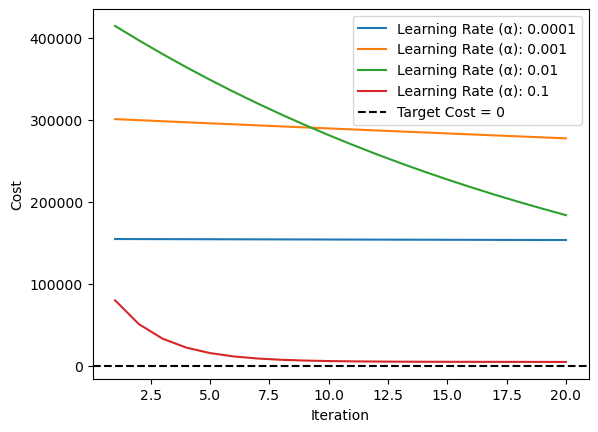

In [7]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
elapsed_times = []
n_iter = 20

for lr in learning_rates:
    start_time = time.time()
    theta = np.random.randn(2, 1) # Initialize weights randomly
    theta, cost_history, theta_history = gradient_descent(X_b, y, theta, lr, n_iter) # Running Gradient Descent
    end_time = time.time()
    elapsed_time = end_time - start_time
    elapsed_times.append(elapsed_time)
    df = df.append({'Learning Rate': lr, 'Total Cost': cost_history[-1]}, ignore_index=True)
    
    plt.plot(range(1, n_iter + 1), cost_history, label=f'Learning Rate (α): {lr}')

plt.axhline(y=0, color='black', linestyle='--', label='Target Cost = 0')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

### Here because the alpha value of 0.1 was able to converge to 0 the quickest, it is considered the most accurate learning rate.

In the next plot will be showing the times it takes for specific learning rate values to finish iterating.

C:\Users\arneyh\AppData\Local\Temp\ipykernel_24232\603534837.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Learning Rate': lr, 'Total Cost': cost_history[-1]}, ignore_index=True)
C:\Users\arneyh\AppData\Local\Temp\ipykernel_24232\603534837.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Learning Rate': lr, 'Total Cost': cost_history[-1]}, ignore_index=True)
C:\Users\arneyh\AppData\Local\Temp\ipykernel_24232\603534837.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Learning Rate': lr, 'Total Cost': cost_history[-1]}, ignore_index=True)


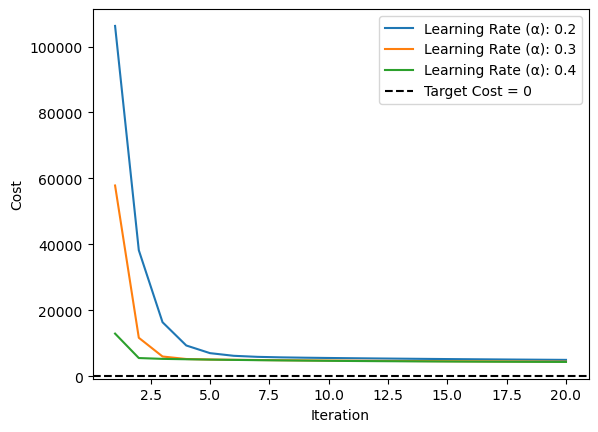

In [8]:
learning_rates2 = [0.2, 0.3, 0.4]
elapsed_times2 = []
n_iter = 20

for lr in learning_rates2:
    start_time = time.time()
    theta = np.random.randn(2, 1) # Initialize weights randomly
    theta, cost_history, theta_history = gradient_descent(X_b, y, theta, lr, n_iter) # Running Gradient Descent
    end_time = time.time()
    elapsed_time = end_time - start_time
    elapsed_times2.append(elapsed_time)
    df = df.append({'Learning Rate': lr, 'Total Cost': cost_history[-1]}, ignore_index=True)
    
    plt.plot(range(1, n_iter + 1), cost_history, label=f'Learning Rate (α): {lr}')

plt.axhline(y=0, color='black', linestyle='--', label='Target Cost = 0')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

C:\Users\arneyh\AppData\Local\Temp\ipykernel_24232\4032622545.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Learning Rate': lr, 'Total Cost': cost_history[-1]}, ignore_index=True)
C:\Users\arneyh\AppData\Local\Temp\ipykernel_24232\4032622545.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Learning Rate': lr, 'Total Cost': cost_history[-1]}, ignore_index=True)
C:\Users\arneyh\AppData\Local\Temp\ipykernel_24232\4032622545.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Learning Rate': lr, 'Total Cost': cost_history[-1]}, ignore_index=True)
C:\Users\arneyh\AppData\Local\Temp\ipykernel_24232\4032622545.py:12: FutureWarning: The frame.append method is deprecated

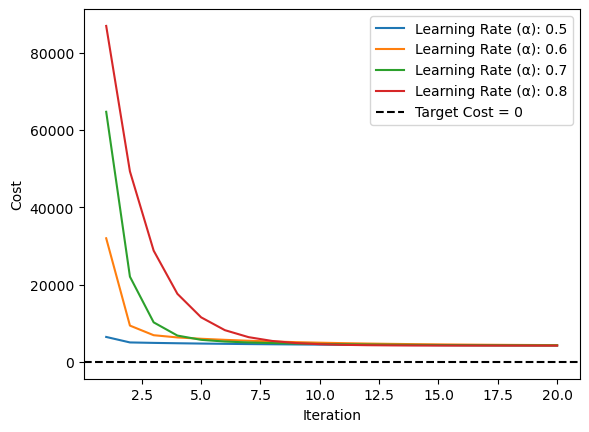

In [9]:
learning_rates3 = [0.5, 0.6, 0.7, 0.8]
elapsed_times3 = []
n_iter = 20

for lr in learning_rates3:
    start_time = time.time()
    theta = np.random.randn(2, 1) # Initialize weights randomly
    theta, cost_history, theta_history = gradient_descent(X_b, y, theta, lr, n_iter) # Running Gradient Descent
    end_time = time.time()
    elapsed_time = end_time - start_time
    elapsed_times3.append(elapsed_time)
    df = df.append({'Learning Rate': lr, 'Total Cost': cost_history[-1]}, ignore_index=True)
    
    plt.plot(range(1, n_iter + 1), cost_history, label=f'Learning Rate (α): {lr}')

plt.axhline(y=0, color='black', linestyle='--', label='Target Cost = 0')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [10]:
df.head(12)

,Learning Rate,Total Cost
0,0.0001,153252.018852
1,0.0010,277204.181544
2,0.0100,183578.680354
3,0.1000,4710.877053
4,0.2000,4993.315835
5,0.3000,4463.706270
6,0.4000,4373.979411
7,0.5000,4275.911269
8,0.6000,4350.753854
9,0.7000,4270.270578


In [11]:
df = df.sort_values(by='Total Cost')
df.head(11)

,Learning Rate,Total Cost
10,0.8000,4212.776031
9,0.7000,4270.270578
7,0.5000,4275.911269
8,0.6000,4350.753854
6,0.4000,4373.979411
5,0.3000,4463.706270
3,0.1000,4710.877053
4,0.2000,4993.315835
0,0.0001,153252.018852
2,0.0100,183578.680354


### From looking at the graph it looks like 0.4 to 0.7 is the optimal learning rate. 0.4 was able to converge in the least amount of iterations, but 0.7 and 0.8 were able to get the lowest total cost values over 20 iterations (what they all ran at). 

In [12]:
learning_rates = learning_rates + learning_rates2 + learning_rates3
elapsed_times = elapsed_times + elapsed_times2 + elapsed_times3

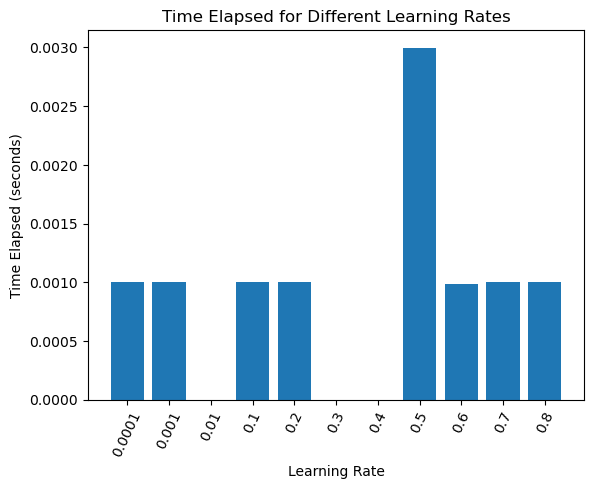

In [13]:
plt.bar(np.arange(len(learning_rates)), elapsed_times, tick_label=[str(lr) for lr in learning_rates])
plt.xticks(rotation = 65)
plt.xlabel('Learning Rate')
plt.ylabel('Time Elapsed (seconds)')
plt.title('Time Elapsed for Different Learning Rates')
plt.show()

### This plot shows a trend where the "larger" the learning rate value gets, the faster the algorithm gets. This is because for this case, the convergence of the gradient descent algorithm becomes faster with the larger rate.

- In this case the smaller alpha value are slower because the steps taken during each iteration are tiny. This means it will take a large number of iterations for the algorithm to reach the minimum of the cost function. However this doesn't simply mean we can just increase the alpha value.

- On the other hand, if the learning rate is too large, the algorithm might overshoot the minimum of the cost function. This canlead to failing to converge to the optimal solution.

## Entrepreneurial Minded Learning

Gradient Descent can be a great tool/addition to be used for machine learning problems, and is particularly helpful with linear and logistic regression models. One such example could include image recoginition where Gradient Descent helps in optimizing the parameters of the models for recognizing and classifying images. We would like to focus on using gradient descent in medical imaging recogonition.

## Business Plan

### Value Proposition:
- We want to improve recoginition of sleep related diseases by using gradient descent. Specific applications could come with improving accuracy in discovering sleep cycles which could greatly enhance treatment planning.

### Customer Segments:
- Our primary target is the healthcare sector, where they have the capability of treating these diseases with our data. This will require us to collaborate closely with hospitals and medical professionals, while following standard healthcare requirements.

### Revenue Streams:
- Our revenue will come through the sale of the software we use to recoginize the sleep patterns that patients are going through. We would then optimize this recoginition using Gradient Descent. We could also provide training programs about how to use the application for healthcare professionals.